In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tree import Tree
from nltk.stem import PorterStemmer

from LinkedIn_Operation_identification import findSynonyms

Finding synonyms of the word search...
Stemming...
Lemmitizating...
Resultant list: 
['find a lost item', 'find', 'find inform', 'rout up', 'explor', 'forag', 'frisk', 'hunt', 'look', 'manhunt', 'pursuit', 'quest', 'ransack', 'scour', 'search']


Finding synonyms of the word add...
Stemming...
Lemmitizating...
Resultant list: 
['add', 'comput a sum', 'add on', 'adjoin', 'button', 'butyl', 'compound', 'concaten', 'enrich', 'foot', 'fortifi', 'gild the lili', 'includ', 'inject', 'intercal']


Tranformed string is: ['Can', 'search', 'himanshu', 'singh']
Operation: search


In [2]:
synJob = findSynonyms('jobs')
JobSyn = ['job']
for syn in synJob:
    if syn not in JobSyn:
        JobSyn.append(syn)

# print(JobSyn)

synOpen = findSynonyms('openings')
OpenSyn = ['opening']
for syn in synOpen:
    if syn not in OpenSyn:
        OpenSyn.append(syn)

# print(OpenSyn)

synPos = findSynonyms('position')
PosSyn = ['position']
for syn in synPos:
    if syn not in PosSyn:
        PosSyn.append(syn)

# print(PosSyn)

In [3]:
import os
os.environ["CORENLP_HOME"] = '/home/shreya\stanford-corenlp-full-2018-02-27'

from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000/')

In [4]:
def stemming(text):
    ps = PorterStemmer()

    w = word_tokenize(text)
    tempword = ""
    for index, every in enumerate(w):
        tempword = tempword + (ps.stem(every))
        if (index != len(w) - 1):
            tempword = tempword + " "

    return tempword

In [5]:
text = ('search LinkedIn')
# text = stemming(text)

output = nlp.annotate( text, properties = { 
    'annotators' : 'tokenize, ssplit, pos, depparse, parse',
    'outputFormat': 'json'})

In [6]:
depTreeStr = output['sentences'][0]['parse']
print(depTreeStr)

(ROOT
  (NP (NN search) (NN LinkedIn)))


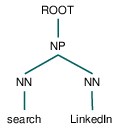

In [7]:
from nltk.tree import ParentedTree
ptree = ParentedTree.fromstring(depTreeStr)
ptree

In [8]:
leaf_values = ptree.leaves()

tree_location = []
flag = 0
for word in OpenSyn:
    if word in leaf_values:
        leaf_index = leaf_values.index(word)
        tree_location = ptree.leaf_treeposition(leaf_index)
        print (tree_location)
        print (ptree[tree_location])
        flag = 1
        break
if(flag == 0):
    for word in PosSyn:
        if word in leaf_values:
            leaf_index = leaf_values.index(word)
            tree_location = ptree.leaf_treeposition(leaf_index)
            print (tree_location)
            print (ptree[tree_location])
            flag = 2
            break
if(flag == 0):
    for word in JobSyn:
        if word in leaf_values:
            leaf_index = leaf_values.index(word)
            tree_location = ptree.leaf_treeposition(leaf_index)
            print (tree_location)
            print (ptree[tree_location])
            flag = 3
            break

[]


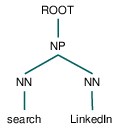

In [14]:
treeLoc = tree_location[:-2]
print(treeLoc)

subtree = ptree[treeLoc]
position = ""
if(treeLoc != []):

    childNodes = subtree.leaves()
    print(childNodes)

    position = (" ".join(childNodes))
    print(position)
    

subtree

In [15]:
position

''